Q2: Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
#import warnings to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
data=pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
# column names
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
#cheking shape of dataset
data.shape

(50, 5)

# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
#Renaming the dataset
data=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
# checking for null values
data.isnull().sum()

RDS       0
ADMS      0
MKTS      0
State     0
Profit    0
dtype: int64

#### insight: There is no null value in any column.

In [9]:
data.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
#check for duplicated record
data[data.duplicated()]

,RDS,ADMS,MKTS,State,Profit


# Correlation Analysis

In [11]:
data.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


#### from above dataframe we can say tha column RDS and Profit are highly correlated.

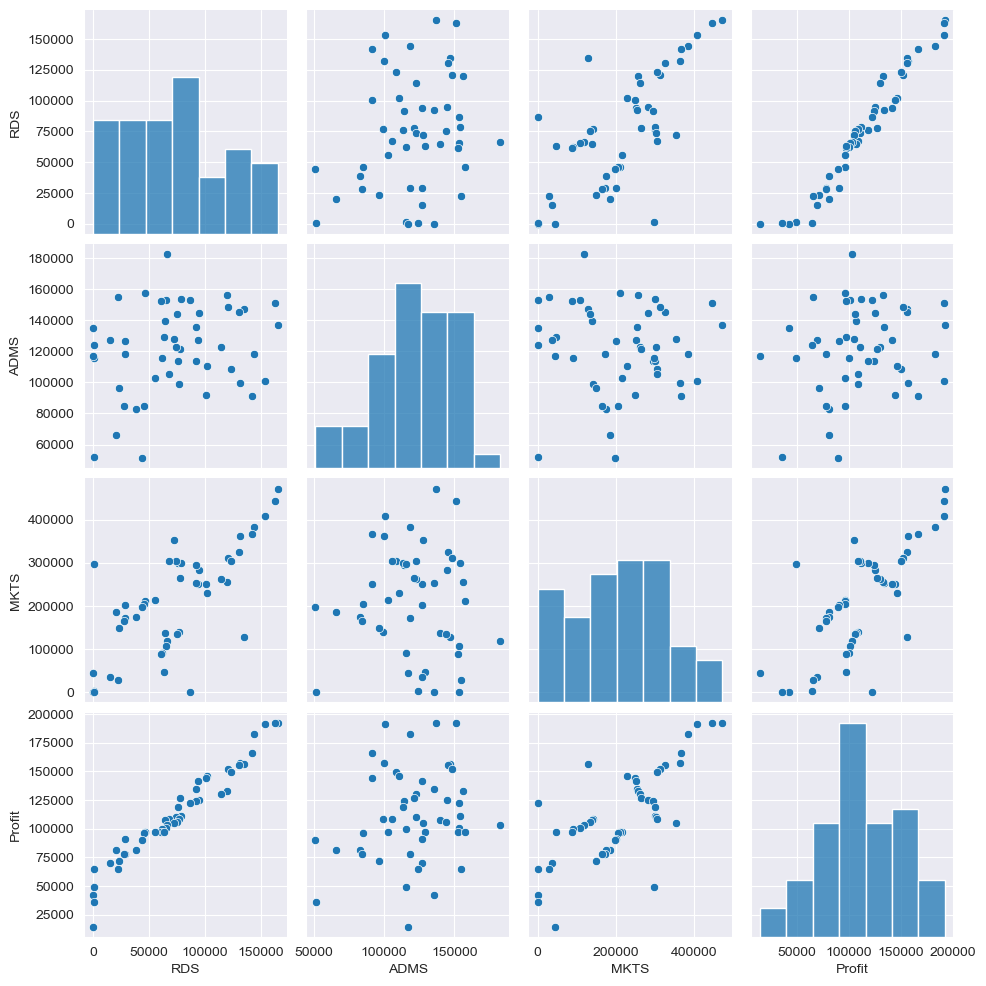

In [12]:
#scatterplot between variables along with histogram to find how data is distrubuted
sns.set_style(style='darkgrid')
sns.pairplot(data)

Insight:
from above pairplot we can say that RDS and Profit columns are highly correlated and MKTS and Profit have sort of correlation.

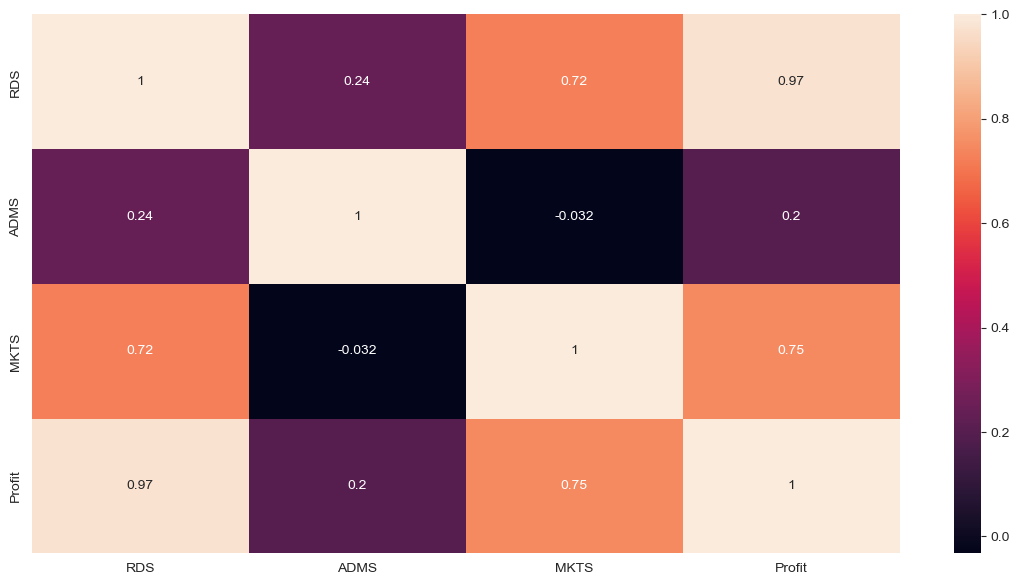

In [13]:
#making a heatmap to check correlation
plt.figure(figsize=(14,7))
sns.heatmap(data.corr(),annot=True,xticklabels=True)
plt.show()

# Model building

In [14]:
model=smf.ols('Profit~RDS+ADMS+MKTS',data=data).fit()
model

In [15]:
#finding coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [16]:
#finding t-values and p_values
model.tvalues,np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [17]:
# R-squared values
model.rsquared,model.rsquared_adj
#when adj_rsquared is greater than rsquqred we add irrelevant feature

(0.9507459940683246, 0.9475337762901719)


Variable 'ADMS' & 'MKTS' have insignificant pvalues.

Here the p value for Administration and Marketing Spend is > 0.05, build simple linear regression and 
multi linear regression models to see pvalues of 'ADMS' & 'MKTS'. 

In [18]:
# simple linear regression to check pvalue of 'ADMS'
slr_a=smf.ols('Profit~ADMS',data=data).fit()
slr_a.tvalues, slr_a.pvalues

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

ADMS have in-significant pvalue

In [19]:
# simple linear regression to check pvalue of 'MKTS'
slr_m=smf.ols('Profit~MKTS',data=data).fit()
slr_m.tvalues, slr_m.pvalues

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

MKTS have Significant pvalue

In [20]:
#multi-linear regression to check p valu of both 'ADMS' & 'MKTS'
mlr_am=smf.ols('Profit~ADMS+MKTS',data=data).fit()
mlr_am.tvalues, mlr_am.pvalues


(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

here for both the varibles have significant pvalues

when we calculate p value of ADMS & MKTS separetly the pvalue of ADMS is less than 0.05
 bt  when we calculate p values together then value is greater than 0.05 means both the features are important.

# Model Validation Techniques

## wo Techniques:
## 1. Collinearity Check (Calculating VIF)

In [21]:
# 1) Collinearity Problem Check
# Detecting multicolinearity using vif
# Calculate VIF = 1/(1-Rsquare) for all independent variables
rsq_rds=smf.ols('RDS~ADMS+MKTS',data=data).fit().rsquared
vif_rds=1/(1-rsq_rds)

rsq_adms=smf.ols('ADMS~RDS+MKTS',data=data).fit().rsquared
vif_adms=1/(1-rsq_adms)

rsq_mkts=smf.ols('MKTS~RDS+ADMS',data=data).fit().rsquared
vif_mkts=1/(1-rsq_mkts)

# Storing vif values in a data frame
d1 = {'Variables':['RDS','ADMS','MKTS'],'VIF':[vif_rds,vif_adms,vif_mkts]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


since No value of VIF is greater than 5 , we can say that there is no collinearity problem. So we will consider all columns(features) for building the model

# 2. Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

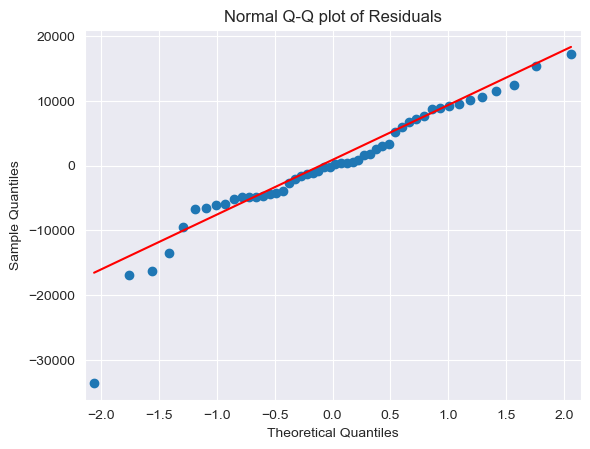

In [22]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of Residuals')
plt.show()

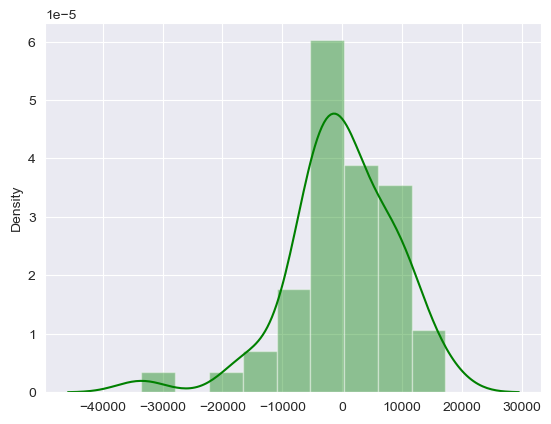

In [23]:
sns.distplot(model.resid,color='green')
plt.show()

In [24]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

# Residual Plot for Homoscedasticity or Heteroscedasticity ( Error vs Target)

In [25]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def standardized_values (vals):
    return (vals-vals.mean())/vals.std()
    
# def standrs_scaling(X):                 
#     return (x - x.mean())/x.std()
# def get_standardized_values( vals ):
#     return (vals - vals.mean())/vals.std()

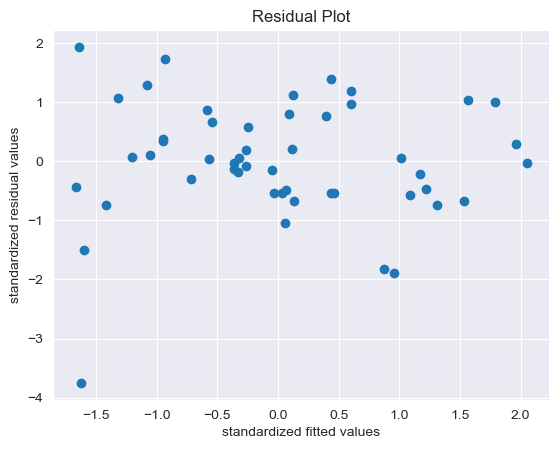

In [26]:
plt.scatter(standardized_values(model.fittedvalues),standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values'),
plt.ylabel('standardized residual values')
plt.show() 


Error VS Target should have no pattern, Error vs target distriburion should be homoscedastic.

Currently The plot between Error and Target is Homoscedastic.

# Residual Vs Regressors ( Error vs Features)

In [27]:
# Test for errors or Residuals Vs Regressors(variables or predictors) 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)

eval_env: 1


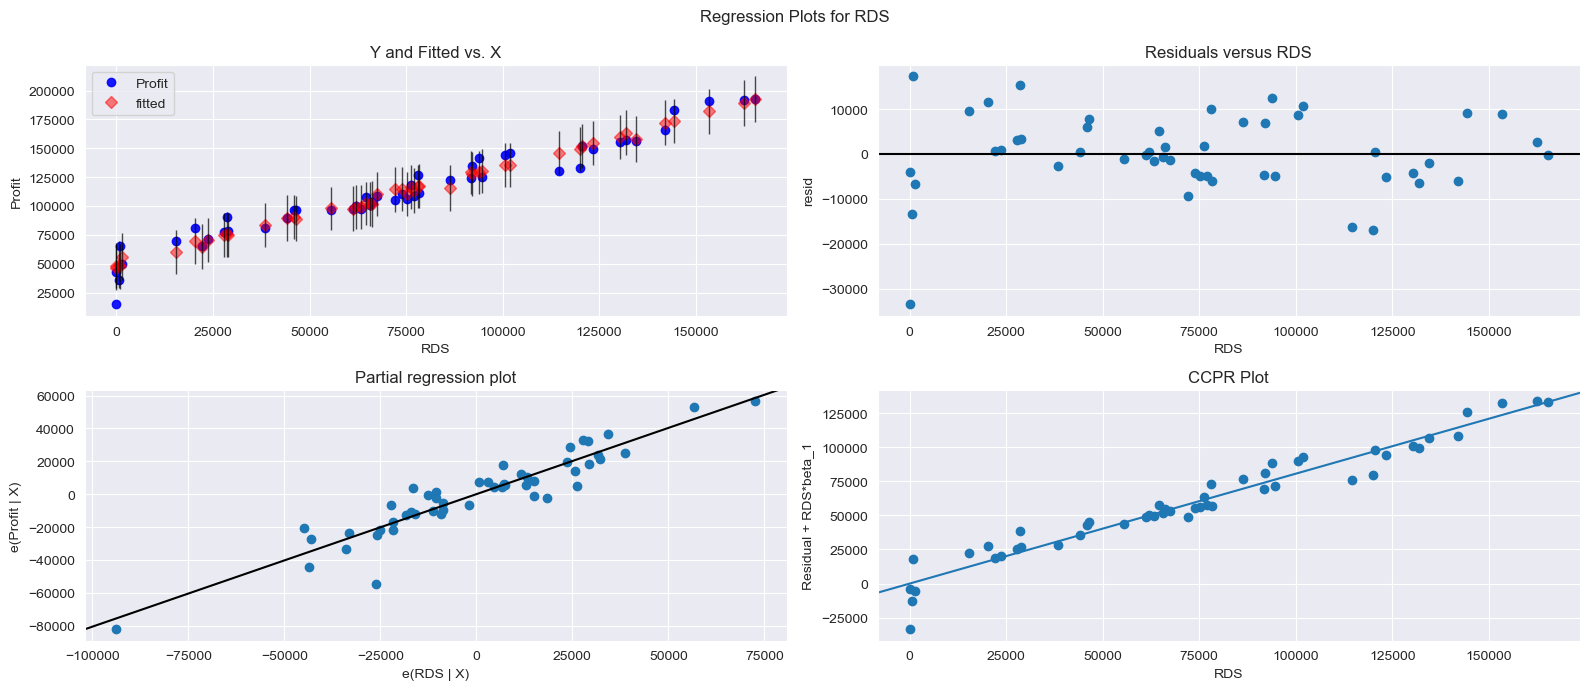

In [28]:
fig=plt.figure(figsize=(16,7))
sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

eval_env: 1


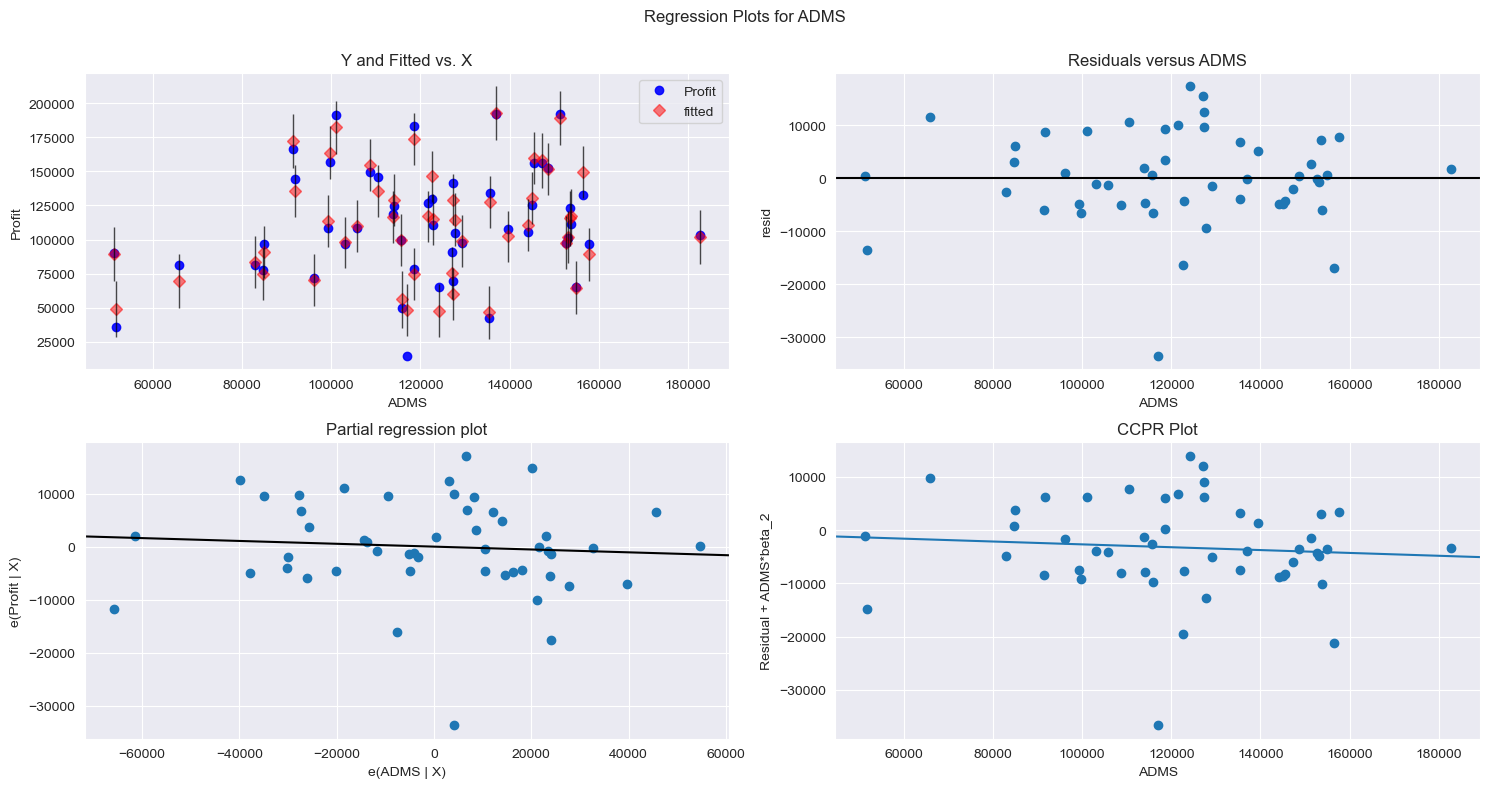

In [29]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


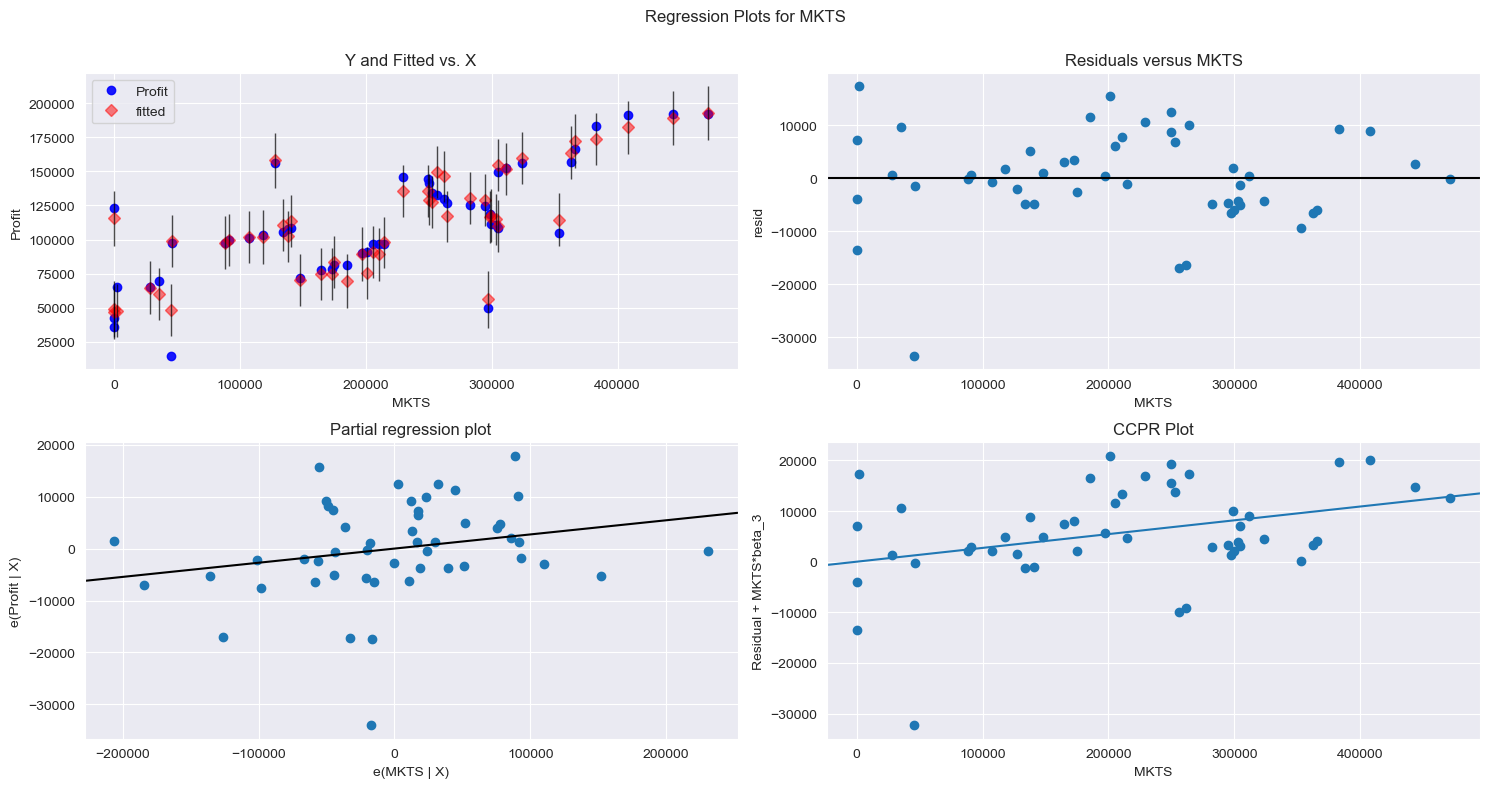

In [30]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

Error VS Feature should have no pattern, Error vs Feature distriburion should be homoscedastic.

Currently The plot between Error and Feature for all the Three cases is Homoscedastic. There is no pattern betwwen Error & Features

# Model Deletion Diagnostics (checking Outliers or Influencers in ROWS)

# Two Techniques :
## 1. Cook's Distance (Work On Rows)

In [31]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance #.cooks_distance this atribute detect outlier with respect to the Rows..
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

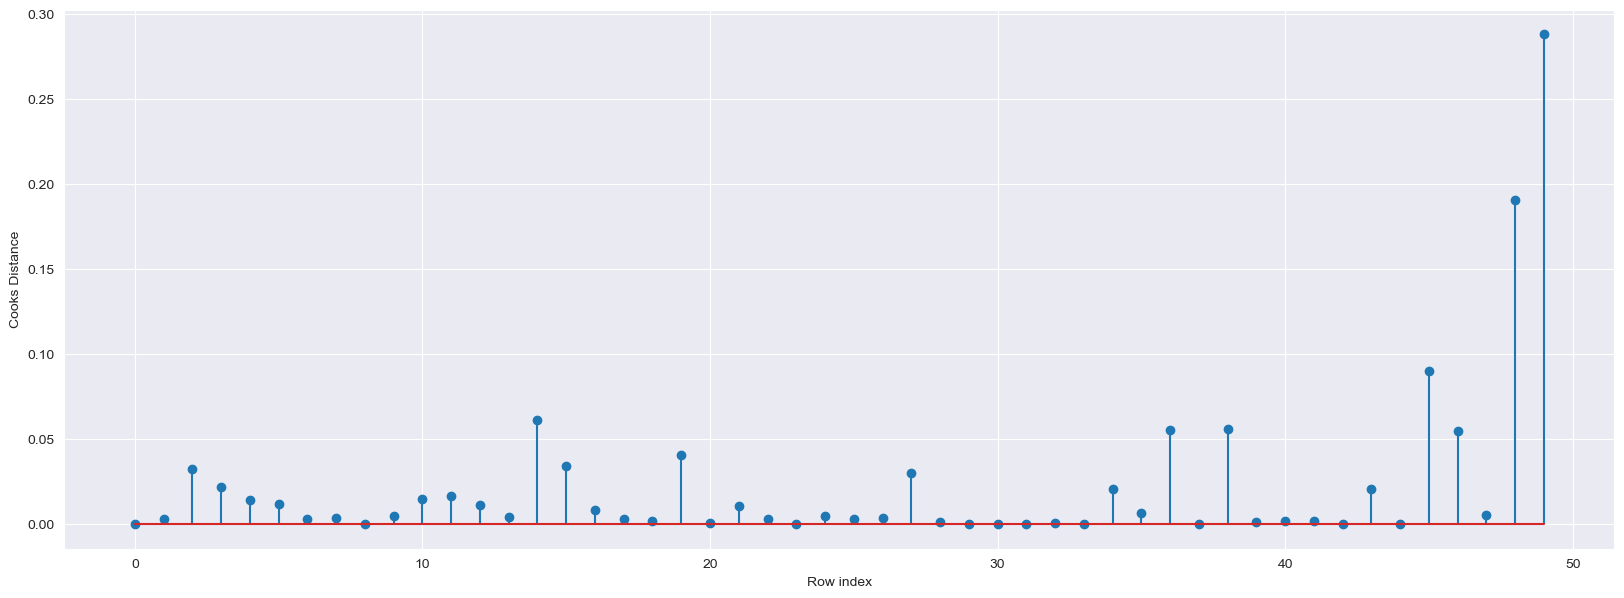

In [32]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 5))  # np.round(c, 5) -> it roundup the values in 3 digits
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [33]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

There is no outlier because all the cook distances are less than 1.

# 2. Leverage value

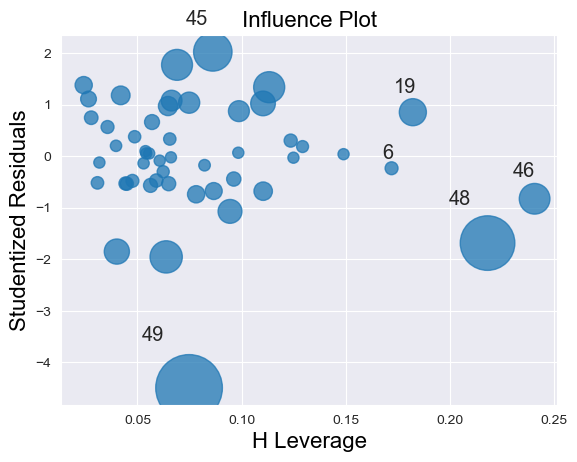

In [34]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [36]:
#Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data.shape[1]
n=data.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

#### From the above plot, it is evident that data point 49 is the influencer.

In [42]:
data[data.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Improving the model

In [44]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data.drop(data.index[[49]],axis=0).reset_index(drop=True)
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Model Deletion Diagnostics and Final Model

In [50]:
FinalModel = smf.ols('Profit~RDS+ADMS+MKTS',data=data1).fit()

In [52]:
# R-squared values
FinalModel.rsquared,FinalModel.rsquared_adj

(0.9613162435129847, 0.9587373264138503)

After treating Influencer the Rsquared value is Increased

The model Accuracy is 96.1%

# Model Predictions

In [39]:
# New data for prediction is
new_data=pd.DataFrame({'RDS':60000,"ADMS":80000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,60000,80000,140000


In [53]:
# Manual Prediction of Price
FinalModel.predict(new_data)

0    101119.149702
dtype: float64

In [55]:
# Automatic Prediction of Price 
pred_y=FinalModel.predict(data1)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

# Table containing R^2 value for each prepared model

In [58]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,FinalModel.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
